#  1 - Importing Dataset.

In [33]:
import numpy as np
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [34]:
#Loading Labeled Dataset with hate tweets IDs
data =  pd.read_csv('twitter_data.csv')
data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


# 2 - ARRANGE DATA INTO FEATURES AND TARGET

In [35]:
features = ['count','hate_speech','offensive_language','neither']
X = data.loc[:, features]
Y = data.loc[:, ['class']]


In [36]:
#Print the features
X

,count,hate_speech,offensive_language,neither
0,3,0,0,3
1,3,0,3,0
2,3,0,3,0
3,3,0,2,1
4,6,0,6,0
...,...,...,...,...
24778,3,0,2,1
24779,3,0,1,2
24780,3,0,3,0
24781,6,0,6,0


C:\Users\subha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


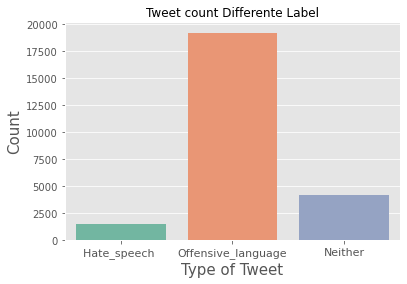

In [37]:
# creating feature bar plot

ax = sns.countplot(data['class'], palette='Set2')

ax.set_title('Tweet count Differente Label',fontsize = 12)
ax.set_xlabel('Type of Tweet',fontsize = 15)
ax.set_ylabel('Count',fontsize = 15)

ax.set_xticklabels(['Hate_speech ','Offensive_language', 'Neither'],fontsize = 11)

total = float(len(data)) # one person per row 

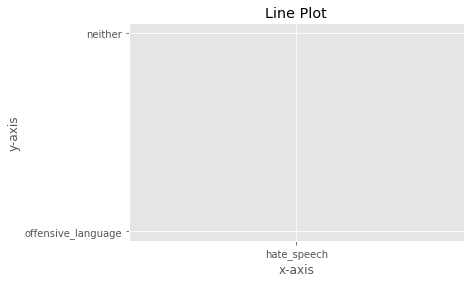

<function matplotlib.pyplot.show(close=None, block=None)>

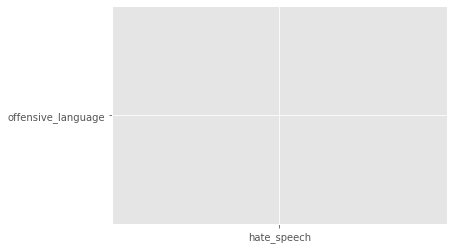

In [38]:
# from matplotlib import pyplot as plt

xaxis = ['hate_speech']
yaxis=['offensive_language']
zaxis=['neither']

plt.plot(xaxis,yaxis,color='g',linestyle=':',linewidth=2.5)
plt.plot(xaxis,zaxis,color='r',linestyle='-',linewidth=1.3)
plt.title("Line Plot")
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.grid(True)
plt.show()
plt.plot(xaxis, yaxis)
plt.show
# plt.subplot(1,2,1)
# plt.plot(xaxis,yaxis,color='g',linestyle=':',linewidth=2)
# plt.subplot(1,2,2)
# plt.plot(xaxis,zaxis,color='r',linestyle=':',linewidth=2)
# plt.show()

In [39]:
#print the test
Y

,class
0,2
1,1
2,1
3,1
4,1
...,...
24778,1
24779,2
24780,1
24781,1


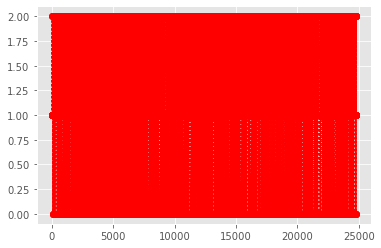

In [40]:


plt.plot(Y, 'o:r')
plt.show()

C:\Users\subha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


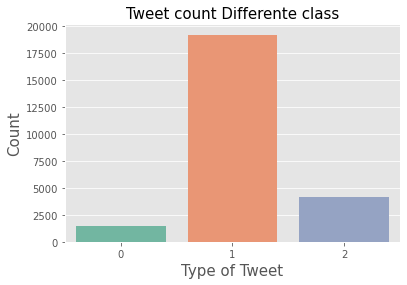

In [41]:


# Class Imbalance 

# fig, ax = plt.subplots(figsize=(10,6))
ax = sns.countplot(data['class'], palette='Set2')

ax.set_title('Tweet count Differente class',fontsize = 15)
ax.set_xlabel('Type of Tweet',fontsize = 15)
ax.set_ylabel('Count',fontsize = 15)
# ax.set_xticklabels(['Hate_speech (0)','Offensive_language(1)', 'Neither(2)'],fontsize = 13)

total = float(len(data)) # one person per row 


## 3- SPLIT DATA INTO TRAINING AND TESTING SETS

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, train_size = .75)


In [43]:
X_train.shape


(18587, 4)

In [44]:
X_test.shape

(6196, 4)

In [45]:
Y_train.shape


(18587, 1)

In [46]:
Y_test.shape

(6196, 1)

In [95]:
# plt.plot(Y_train,Y_train)
# plt.title('x vs y')
# plt.xlabel('This is x axis')
# plt.ylabel('This is y axis')

In [96]:
# plt.subplot(1,2,1)
# plt.plot(X_train,X_train,color='g',linestyle=':',linewidth=2)
# plt.subplot(1,2,2)
# plt.plot(X_test,X_test,color='r',linestyle=':',linewidth=2)
# plt.show()

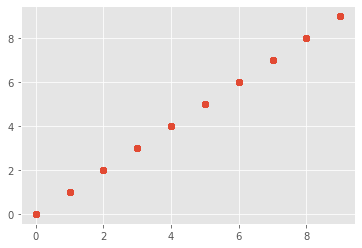

In [97]:
plt.scatter(X_train,X_train)
plt.show()

([<matplotlib.patches.Wedge at 0x1e4fe603bb0>,
 [Text(0.7203467861122989, 0.8313245501834299, 'class'),
  Text(-0.6592054706385213, 0.8805953369625833, 'hate_speech'),
  Text(-0.5947048283136996, -0.9253789316708985, 'offensive_language'),
  Text(1.0306447473965061, -0.38441046378056937, 'neither')])

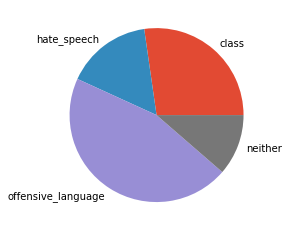

In [54]:
features = ['class','hate_speech','offensive_language','neither']
quantity = [60,35,100,25]
plt.pie(quantity,labels=features)



# X = data.loc[:, features]
# Y = data.loc[:, ['class']]


([<matplotlib.patches.Wedge at 0x1e4fe5c7430>],
 [Text(-1.6500000000000001, 2.020667218593133e-16, '')])

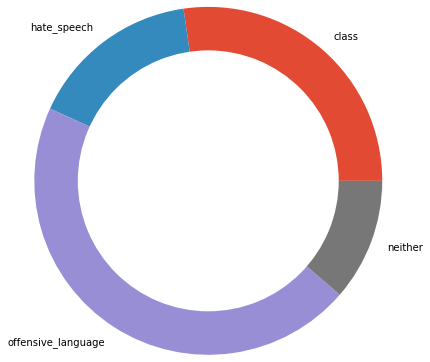

In [52]:
#making plot
plt.pie(quantity,labels=features,radius=2)
plt.pie([1],colors=['w'],radius=1.5)

In [67]:
# sns.lineplot(x='features',y='class',hue='event')

## 4  implementation of algorithms 

In [58]:
# import necessary functions and libraries.
import nltk
from nltk.corpus import twitter_samples
from nltk.corpus import stopwords

import numpy as np

In [60]:
# download the dataset and the stopwords from nltk.
nltk.download('twitter_samples')
nltk.download('stopwords')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\subha\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\subha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [61]:
# load the text fields of the positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [62]:
# show some tweet
np.random.seed(1)
rand = np.random.randint(0,5000,5)

In [75]:
# print positive tweet
print('Positive tweets::')
print('\033[92m')  #//for green color
for i in rand:
    print(all_positive_tweets[i])

Positive tweets::

@ZarlashtFaisal @Tabinda_Samar Sethi was HIGH ??? :)
Fav if awake fam :)
Just smile even your in Pain :) http://t.co/AxTiqf0xek
camillus pleaseee? :)
Why have i just painted my nails pink :) ???


In [76]:
# print negativee tweet
print('negative tweets::')
print('\033[91m') #////for red color
for i in rand:
    print(all_negative_tweets[i])

negative tweets::

I need a big cuddle from Lew and kisses on my face :(((( I don't want to go through this again
@kaiality too late now :(
traffic :-(
Soft defence by the best defensive team there :( #NRLTigersRoosters
@LukeBryanOnline Yayyyy!!! I hope it's not while I am knocked out by anesthesia. I will be so sad if I miss it :(


In [77]:
import re
import string

from nltk.tokenize import TweetTokenizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

def process_tweet(tweet):
  stemmer = PorterStemmer() 
  stopwords_english = stopwords.words('english')

  # remove the stock market tickers
  tweet = re.sub(r'\$\w*', '', tweet)

  # remove the old styles retweet text 'RT'
  tweet = re.sub(r'^RT[\s]+', '', tweet)

  # remove the hyperlinks
  tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)

  # remove the # symbol
  tweet = re.sub(r'#', '', tweet)

  # Tokenize the tweet
  tokenizer = TweetTokenizer(preserve_case=False, reduce_len=True, strip_handles=True)
  tweet_tokens = tokenizer.tokenize(tweet)

  tweet_clean = []

  # removing stopwords and punctuation
  for word in tweet_tokens:
    if (word not in stopwords_english and
        word not in string.punctuation):
      stem_word = stemmer.stem(word)    #stemming
      tweet_clean.append(stem_word)

  return tweet_clean

In [78]:
# process_tweet on a random tweet from the dataset
tweet = all_positive_tweets[np.random.randint(0,5000)]
print('Raw tweet :\n',tweet)
tweet = process_tweet(tweet)
print('After processing the tweet: \n', tweet)


Raw tweet :
 @heyoppar @Zain9898 @bemybelief @hetthuocchua there's gonna be another one in the finale :)))))
After processing the tweet: 
 ["there'", 'gonna', 'anoth', 'one', 'final', ':)']


In [79]:
def count_tweets(tweets, ys):
  ys_list = np.squeeze(ys).tolist()
  freqs ={}

  for y, tweet in zip(ys_list, tweets):
    for word in process_tweet(tweet):
      pair = (word, y)
      if pair in freqs:
        freqs[pair] +=1
      else:
        freqs[pair] = 1
  
  return freqs

In [80]:
# splitting the data for training and testing 
train_pos = all_positive_tweets[:4000]
test_pos = all_positive_tweets[4000:]

train_neg = all_negative_tweets[:4000]
test_neg = all_negative_tweets[4000:]

train_x = train_pos + train_neg
test_x = test_pos + test_neg

# numpy array for the labels in the training set
train_y = np.append(np.ones((len(train_pos))), np.zeros((len(train_neg))))
test_y = np.append(np.ones((len(test_neg))), np.zeros((len(test_neg))))

In [81]:
def lookup(freqs, word, label):
  n = 0
  pair = (word, label)
  if pair in freqs:
    n = freqs[pair]
  return n 

In [82]:
# Build a frequency dictionary
freqs = count_tweets(train_x, train_y)

def train_naive_bayes(freqs, train_x, train_y):
  logliklihood = {}
  logprior = 0

  # calculate V, number of unique words in the vocabulary
  vocab = set([pair[0] for pair in freqs.keys()])
  V = len(vocab)

  ## Calculate N_pos, N_neg, V_pos, V_neg
  # N_pos : total number of positive words
  # N_neg : total number of negative words
  # V_pos : total number of unique positive words
  # V_neg : total number of unique negative words

  N_pos = N_neg = V_pos = V_neg = 0
  for pair in freqs.keys():
    if pair[1]>0:
      V_pos +=1
      N_pos += freqs[pair]
    else:
      V_neg +=1
      N_neg += freqs[pair]

  # Number of Documents (tweets)
  D = len(train_y)

  # D_pos, number of positive documnets
  D_pos = len(list(filter(lambda x: x>0, train_y)))

  # D_pos, number of negative documnets
  D_neg = len(list(filter(lambda x: x<=0, train_y)))

  # calculate the logprior
  logprior = np.log(D_pos) - np.log(D_neg)

  for word in vocab:
    freqs_pos = lookup(freqs, word, 1)
    freqs_neg = lookup(freqs, word, 0)

    # calculte the probability of each word being positive and negative
    p_w_pos = (freqs_pos+1)/(N_pos+V)
    p_w_neg = (freqs_neg+1)/(N_neg+V)

    logliklihood[word] = np.log(p_w_pos/p_w_neg)
  
  return logprior, logliklihood

In [83]:
logprior, loglikelihood = train_naive_bayes(freqs, train_x, train_y)
print(logprior)
print(len(loglikelihood))

0.0
9086


In [84]:
def naive_bayes_predict(tweet, logprior, loglikelihood):
  word_l = process_tweet(tweet)
  p = 0
  p+=logprior

  for word in word_l:
    if word in loglikelihood:
      p+=loglikelihood[word]

  return p

In [92]:
def test_naive_bayes(test_x, test_y, logprior, loglikelihood):
  accuracy = 0
  y_hats = []
  for tweet in test_x:
    if naive_bayes_predict(tweet, logprior, loglikelihood) > 0:
      y_hat_i = 1
    else:
      y_hat_i = 0
    y_hats.append(y_hat_i)
  error = np.mean(np.absolute(test_y - y_hats))
  accuracy = 1-error

  return accuracy
  
print("Naive Bayes accuracy = %0.4f " %
      (test_naive_bayes(test_x, test_y, logprior, loglikelihood)))

Naive Bayes accuracy = 0.9940 


In [86]:
# make predictions on our own tweets
tweets = ['I am happy','iam bad','great']
for tweet in tweets:
    p = naive_bayes_predict(tweet,logprior,loglikelihood)
    if p>1:
        print(f'{tweet}::positivesentment({p:.2f})')
    else:
        print(f'{tweet}::negativesentment({p:.2f})')

I am happy::positivesentment(2.15)
iam bad::negativesentment(-2.39)
great::positivesentment(2.14)


#  Confusion matrix


In [3]:
# import numpy as np
# import pandas as pd

# #method:1 Requires Model
# from sklearn.metrics import plot_confusion_matrix

# #Method:2 Requires actual and predict features
# from sklearn.linear_model import LogisticRegression

# #train test pattition
# from sklearn.model_selection import train_test_split

# #get Data Import Path
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))